In [4]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [9]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/TargetGenes/distance_from_TSS
for process in Universal EarlyEmbryoSpecific PGCSpecific SpermSpecific RetinalSpecific HeartSpecific LiverSpecific;do
    bedtools closest -a /mnt/Storage/home/yanghui/annotations/mm10/mm10.TSS.refGene.bed -b ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/${process}.CHM.bed -d | awk 'BEGIN{FS=OFS="\t"} $10<=100000 && $10!=-1 {print}' > ${process}_CHM_TSS_distance_within100kb.bed
done

In [10]:
tss_distance_df = {}
for process in ['Universal', 'EarlyEmbryoSpecific', 'PGCSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific'] :
    tss_distance_df[process] = pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/TargetGenes/distance_from_TSS/{process}_CHM_TSS_distance_within100kb.bed',
                                  sep = "\t", header = None, names = ['chr', 'start', 'end', 'Transcript_id', 'score', 'strand', 'CHM_chr', 'CHM_start', 'CHM_end', 'distance']
                                 )
    

tss_distance_df['Universal']

,chr,start,end,Transcript_id,score,strand,CHM_chr,CHM_start,CHM_end,distance
0,chr1,4497354,4497355,NM_001289464,0,-,chr1,4556800,4560500,59446
1,chr1,4497354,4497355,NM_001289465,0,-,chr1,4556800,4560500,59446
2,chr1,4497354,4497355,NM_001289466,0,-,chr1,4556800,4560500,59446
3,chr1,4497354,4497355,NM_001289467,0,-,chr1,4556800,4560500,59446
4,chr1,4497354,4497355,NM_011441,0,-,chr1,4556800,4560500,59446
...,...,...,...,...,...,...,...,...,...,...
7208,chr9,123717625,123717626,NM_033322,0,-,chr9,123745200,123749900,27575
7209,chr9,123717625,123717626,NR_151689,0,-,chr9,123745200,123749900,27575
7210,chr9,123767210,123767211,NM_001166625,0,+,chr9,123745200,123749900,17311
7211,chr9,123767210,123767211,NM_009913,0,+,chr9,123745200,123749900,17311


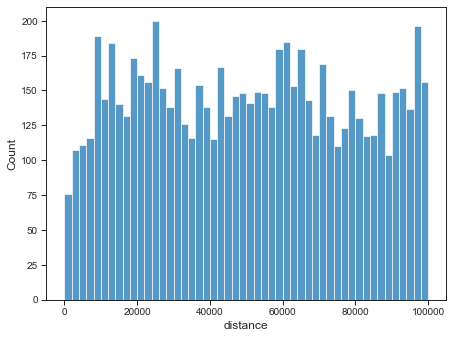

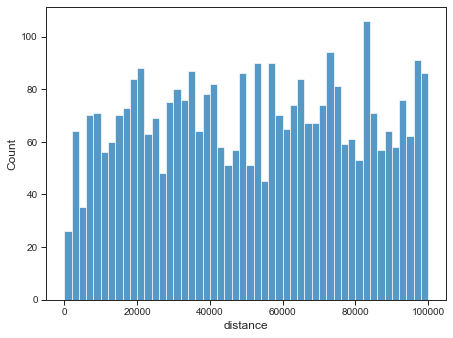

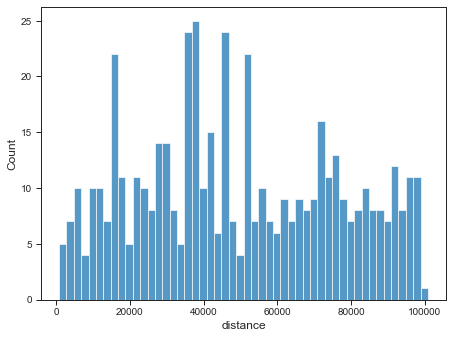

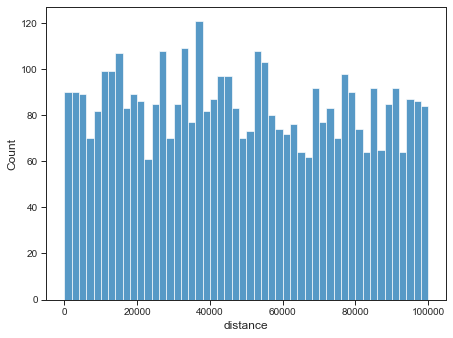

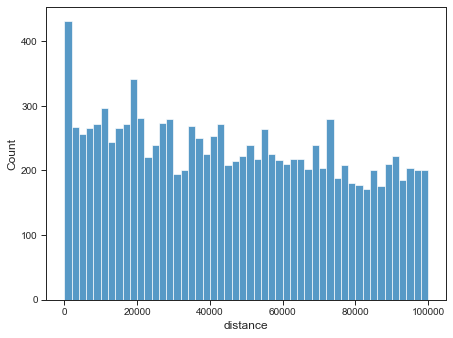

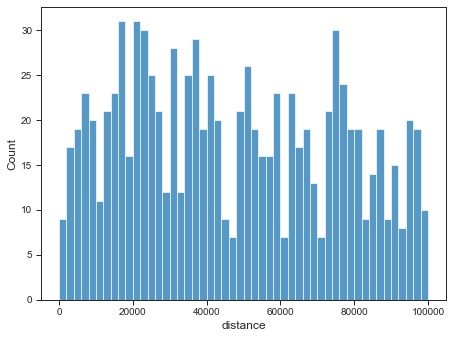

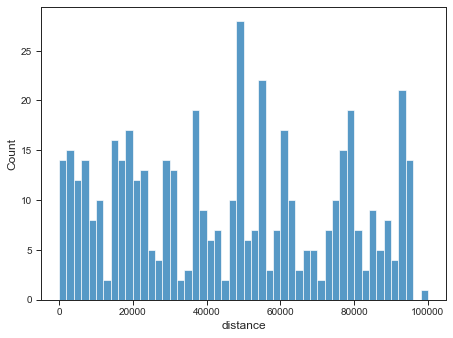

In [15]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process in ['Universal', 'EarlyEmbryoSpecific', 'PGCSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific'] :
        fig, ax = plt.subplots(figsize = (6.4, 4.8), tight_layout = True)
        sns.histplot(
            data = tss_distance_df[process],
            x = 'distance',
            ax = ax,
            binwidth=2000
        )